In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from tree.utils import *
from sklearn.model_selection import train_test_split

np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values

### Discrete Input Discrete Output

In [ ]:
# synthetic dataset
N = 1000
M = 5
features = pd.DataFrame(np.random.randint(0, 2, (N, M)))
labels = pd.Series(np.random.randint(0, 2, N))

num_average_time = 100  # repeat each timing experiment 100 times

avg_train_per_feature = []
avg_test_per_feature = []

# 1 feature
one_feat_train_times = []
one_feat_test_times = []

for col in features.columns:
    subset = features[[col]]
    X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

    X_tr = X_tr.reset_index(drop=True)
    y_tr = pd.Series(y_tr).reset_index(drop=True)

    # repeat multiple times for averaging
    for _ in range(num_average_time):
        start = time.time()
        dt_model = DecisionTree(criterion="information_gain")
        dt_model.fit(X_tr, y_tr)
        end = time.time()
        one_feat_train_times.append(end - start)

        start = time.time()
        preds = dt_model.predict(X_te)
        end = time.time()
        one_feat_test_times.append(end - start)

print(f"Avg training time (1 feature): {np.mean(one_feat_train_times)}")
print(f"Avg testing time  (1 feature): {np.mean(one_feat_test_times)}")

avg_train_per_feature.append(np.mean(one_feat_train_times))
avg_test_per_feature.append(np.mean(one_feat_test_times))


# 2 features
two_feat_train_times = []
two_feat_test_times = []

for i in range(len(features.columns)):
    for j in range(i + 1, len(features.columns)):
        subset = features[[features.columns[i], features.columns[j]]]
        X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

        X_tr = X_tr.reset_index(drop=True)
        y_tr = pd.Series(y_tr).reset_index(drop=True)

        for _ in range(num_average_time):
            start = time.time()
            dt_model = DecisionTree(max_depth=5, criterion="information_gain")
            dt_model.fit(X_tr, y_tr)
            end = time.time()
            two_feat_train_times.append(end - start)

            start = time.time()
            preds = dt_model.predict(X_te)
            end = time.time()
            two_feat_test_times.append(end - start)

print(f"Avg training time (2 features): {np.mean(two_feat_train_times)}")
print(f"Avg testing time  (2 features): {np.mean(two_feat_test_times)}")

avg_train_per_feature.append(np.mean(two_feat_train_times))
avg_test_per_feature.append(np.mean(two_feat_test_times))


# 3 features
three_feat_train_times = []
three_feat_test_times = []

for a in range(len(features.columns)):
    for b in range(a + 1, len(features.columns)):
        for c in range(b + 1, len(features.columns)):
            subset = features[[features.columns[a], features.columns[b], features.columns[c]]]
            X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

            X_tr = X_tr.reset_index(drop=True)
            y_tr = pd.Series(y_tr).reset_index(drop=True)

            for _ in range(num_average_time):
                start = time.time()
                dt_model = DecisionTree(max_depth=5, criterion="information_gain")
                dt_model.fit(X_tr, y_tr)
                end = time.time()
                three_feat_train_times.append(end - start)

                start = time.time()
                preds = dt_model.predict(X_te)
                end = time.time()
                three_feat_test_times.append(end - start)

print(f"Avg training time (3 features): {np.mean(three_feat_train_times)}")
print(f"Avg testing time  (3 features): {np.mean(three_feat_test_times)}")

avg_train_per_feature.append(np.mean(three_feat_train_times))
avg_test_per_feature.append(np.mean(three_feat_test_times))


# 4 features
four_feat_train_times = []
four_feat_test_times = []

for i in range(len(features.columns)):
    for j in range(i + 1, len(features.columns)):
        for k in range(j + 1, len(features.columns)):
            for l in range(k + 1, len(features.columns)):
                subset = features[[features.columns[i], features.columns[j],
                                   features.columns[k], features.columns[l]]]
                X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

                X_tr = X_tr.reset_index(drop=True)
                y_tr = pd.Series(y_tr).reset_index(drop=True)

                for _ in range(num_average_time):
                    start = time.time()
                    dt_model = DecisionTree(max_depth=5, criterion="information_gain")
                    dt_model.fit(X_tr, y_tr)
                    end = time.time()
                    four_feat_train_times.append(end - start)

                    start = time.time()
                    preds = dt_model.predict(X_te)
                    end = time.time()
                    four_feat_test_times.append(end - start)

print(f"Avg training time (4 features): {np.mean(four_feat_train_times)}")
print(f"Avg testing time  (4 features): {np.mean(four_feat_test_times)}")

avg_train_per_feature.append(np.mean(four_feat_train_times))
avg_test_per_feature.append(np.mean(four_feat_test_times))


# 5 features
five_feat_train_times = []
five_feat_test_times = []

subset = features  # all 5 columns
X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

X_tr = X_tr.reset_index(drop=True)
y_tr = pd.Series(y_tr).reset_index(drop=True)

for _ in range(num_average_time):
    start = time.time()
    dt_model = DecisionTree(max_depth=5, criterion="information_gain")
    dt_model.fit(X_tr, y_tr)
    end = time.time()
    five_feat_train_times.append(end - start)

    start = time.time()
    preds = dt_model.predict(X_te)
    end = time.time()
    five_feat_test_times.append(end - start)

print(f"Avg training time (5 features): {np.mean(five_feat_train_times)}")
print(f"Avg testing time  (5 features): {np.mean(five_feat_test_times)}")

avg_train_per_feature.append(np.mean(five_feat_train_times))
avg_test_per_feature.append(np.mean(five_feat_test_times))


Avg training time (1 feature): 0.0032284803390502928
Avg testing time  (1 feature): 0.006972334384918213
Avg training time (2 features): 0.006025115251541138
Avg testing time  (2 features): 0.007770890474319458
Avg training time (3 features): 0.008419930934906006
Avg testing time  (3 features): 0.007941679954528809
Avg training time (4 features): 0.01089962911605835
Avg testing time  (4 features): 0.008352684497833251
Avg training time (5 features): 0.014044854640960693
Avg testing time  (5 features): 0.00921323299407959


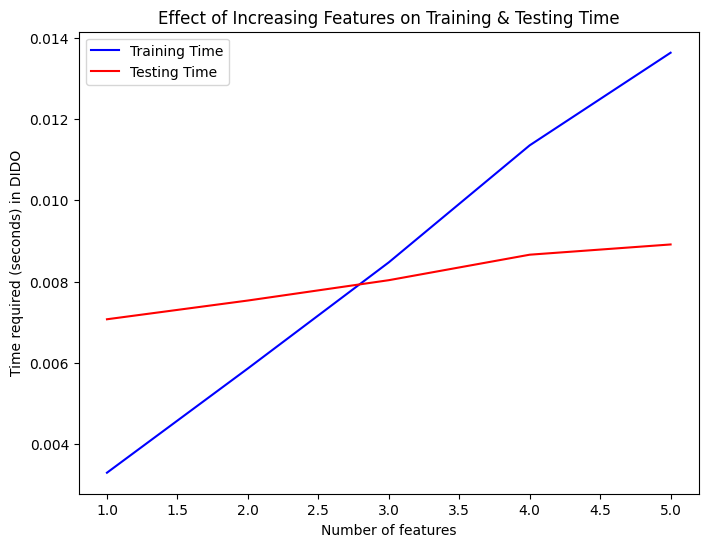

In [ ]:
x_axis = np.linspace(1, 5, 5)

plt.figure(figsize=(8, 6))
plt.plot(x_axis, avg_train_per_feature, color="blue", label="Training Time")
plt.plot(x_axis, avg_test_per_feature, color="red", label="Testing Time")
plt.xlabel("Number of features")
plt.ylabel("Time required (seconds) in DIDO")
plt.title("Effect of Increasing Features on Training & Testing Time")
plt.legend()
plt.show()

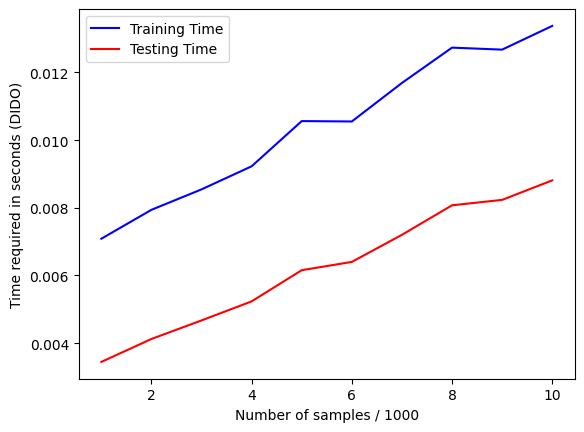

In [ ]:
# Effect of increasing number of samples on training and testing time (DIDO case)

train_times_rows = []
test_times_rows = []
num_splits = 10
chunk_size = N // num_splits

for split in range(1, num_splits + 1):
    end_idx = chunk_size * split
    X_subset = features[:end_idx]
    y_subset = labels[:end_idx]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

    X_train = X_train.reset_index(drop=True)
    y_train = pd.Series(y_train).reset_index(drop=True)

    # repeat num_average_time times for averaging
    split_train_times = []
    split_test_times = []

    for _ in range(num_average_time):
        start = time.time()
        dtree = DecisionTree(criterion="information_gain")
        dtree.fit(X_train, y_train)
        end = time.time()
        split_train_times.append(end - start)

        start = time.time()
        preds = dtree.predict(X_test)
        end = time.time()
        split_test_times.append(end - start)

    train_times_rows.append(np.mean(split_train_times))
    test_times_rows.append(np.mean(split_test_times))

# Plot
x_axis = np.linspace(1, num_splits, num_splits)
plt.plot(x_axis, train_times_rows, color="blue", label="Training Time")
plt.plot(x_axis, test_times_rows, color="red", label="Testing Time")
plt.xlabel("Number of samples / 1000")
plt.ylabel("Time required in seconds (DIDO)")
plt.legend()
plt.show()


### Discrete Input Real Output

In [ ]:
# Synthetic dataset for DIRO (Discrete Input, Real Output)
N = 1000
M = 5
features = pd.DataFrame(np.random.randint(0, 2, (N, M)))
labels = pd.Series(np.random.randn(N))

avg_train_per_feature = []
avg_test_per_feature = []

# 1 feature
one_feat_train_times = []
one_feat_test_times = []

for _ in range(num_average_time):
    for col in features.columns:
        subset = features[[col]]
        X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

        X_tr = X_tr.reset_index(drop=True)
        y_tr = pd.Series(y_tr).reset_index(drop=True)

        start = time.time()
        dt_model = DecisionTree(criterion="information_gain")
        dt_model.fit(X_tr, y_tr)
        end = time.time()
        one_feat_train_times.append(end - start)

        start = time.time()
        preds = dt_model.predict(X_te.reset_index(drop=True))
        end = time.time()
        one_feat_test_times.append(end - start)

print(f"Avg training time (1 feature): {np.mean(one_feat_train_times)}")
print(f"Avg testing time  (1 feature): {np.mean(one_feat_test_times)}")

avg_train_per_feature.append(np.mean(one_feat_train_times))
avg_test_per_feature.append(np.mean(one_feat_test_times))


# 2 features
two_feat_train_times = []
two_feat_test_times = []

for _ in range(num_average_time):
    for i in range(len(features.columns)):
        for j in range(i + 1, len(features.columns)):
            subset = features[[features.columns[i], features.columns[j]]]
            X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

            X_tr = X_tr.reset_index(drop=True)
            y_tr = pd.Series(y_tr).reset_index(drop=True)

            start = time.time()
            dt_model = DecisionTree(max_depth=5, criterion="information_gain")
            dt_model.fit(X_tr, y_tr)
            end = time.time()
            two_feat_train_times.append(end - start)

            start = time.time()
            preds = dt_model.predict(X_te.reset_index(drop=True))
            end = time.time()
            two_feat_test_times.append(end - start)

print(f"Avg training time (2 features): {np.mean(two_feat_train_times)}")
print(f"Avg testing time  (2 features): {np.mean(two_feat_test_times)}")

avg_train_per_feature.append(np.mean(two_feat_train_times))
avg_test_per_feature.append(np.mean(two_feat_test_times))


# 3 features
three_feat_train_times = []
three_feat_test_times = []

for _ in range(num_average_time):
    for a in range(len(features.columns)):
        for b in range(a + 1, len(features.columns)):
            for c in range(b + 1, len(features.columns)):
                subset = features[[features.columns[a], features.columns[b], features.columns[c]]]
                X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

                X_tr = X_tr.reset_index(drop=True)
                y_tr = pd.Series(y_tr).reset_index(drop=True)

                start = time.time()
                dt_model = DecisionTree(max_depth=5, criterion="information_gain")
                dt_model.fit(X_tr, y_tr)
                end = time.time()
                three_feat_train_times.append(end - start)

                start = time.time()
                preds = dt_model.predict(X_te.reset_index(drop=True))
                end = time.time()
                three_feat_test_times.append(end - start)

print(f"Avg training time (3 features): {np.mean(three_feat_train_times)}")
print(f"Avg testing time  (3 features): {np.mean(three_feat_test_times)}")

avg_train_per_feature.append(np.mean(three_feat_train_times))
avg_test_per_feature.append(np.mean(three_feat_test_times))


# 4 features
four_feat_train_times = []
four_feat_test_times = []

for _ in range(num_average_time):
    subset = features.iloc[:, :4]
    X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

    X_tr = X_tr.reset_index(drop=True)
    y_tr = pd.Series(y_tr).reset_index(drop=True)

    start = time.time()
    dt_model = DecisionTree(max_depth=5, criterion="information_gain")
    dt_model.fit(X_tr, y_tr)
    end = time.time()
    four_feat_train_times.append(end - start)

    start = time.time()
    preds = dt_model.predict(X_te.reset_index(drop=True))
    end = time.time()
    four_feat_test_times.append(end - start)

print(f"Avg training time (4 features): {np.mean(four_feat_train_times)}")
print(f"Avg testing time  (4 features): {np.mean(four_feat_test_times)}")

avg_train_per_feature.append(np.mean(four_feat_train_times))
avg_test_per_feature.append(np.mean(four_feat_test_times))


# 5 features
five_feat_train_times = []
five_feat_test_times = []

for _ in range(num_average_time):
    subset = features  # all 5 columns
    X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

    X_tr = X_tr.reset_index(drop=True)
    y_tr = pd.Series(y_tr).reset_index(drop=True)

    start = time.time()
    dt_model = DecisionTree(max_depth=5, criterion="information_gain")
    dt_model.fit(X_tr, y_tr)
    end = time.time()
    five_feat_train_times.append(end - start)

    start = time.time()
    preds = dt_model.predict(X_te.reset_index(drop=True))
    end = time.time()
    five_feat_test_times.append(end - start)

print(f"Avg training time (5 features): {np.mean(five_feat_train_times)}")
print(f"Avg testing time  (5 features): {np.mean(five_feat_test_times)}")

avg_train_per_feature.append(np.mean(five_feat_train_times))
avg_test_per_feature.append(np.mean(five_feat_test_times))

Avg training time (1 feature): 0.003623610019683838
Avg testing time  (1 feature): 0.008669538974761963
Avg training time (2 features): 0.009745813608169555
Avg testing time  (2 features): 0.01016042470932007
Avg training time (3 features): 0.021854533433914185
Avg testing time  (3 features): 0.011940939664840697
Avg training time (4 features): 0.04302128553390503
Avg testing time  (4 features): 0.01342452049255371
Avg training time (5 features): 0.08603599786758423
Avg testing time  (5 features): 0.015255537033081055


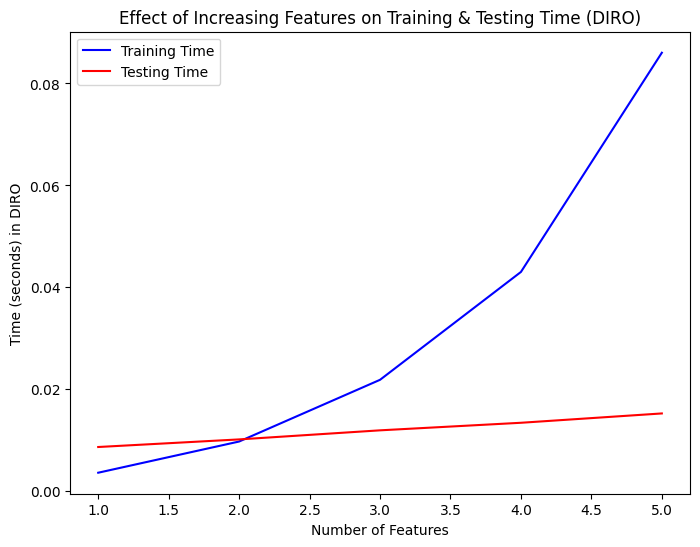

In [ ]:
x_axis = np.linspace(1, 5, 5)

plt.figure(figsize=(8, 6))
plt.plot(x_axis, avg_train_per_feature, color="blue", label="Training Time")
plt.plot(x_axis, avg_test_per_feature, color="red", label="Testing Time")
plt.xlabel("Number of Features")
plt.ylabel("Time (seconds) in DIRO")
plt.title("Effect of Increasing Features on Training & Testing Time (DIRO)")
plt.legend()
plt.show()

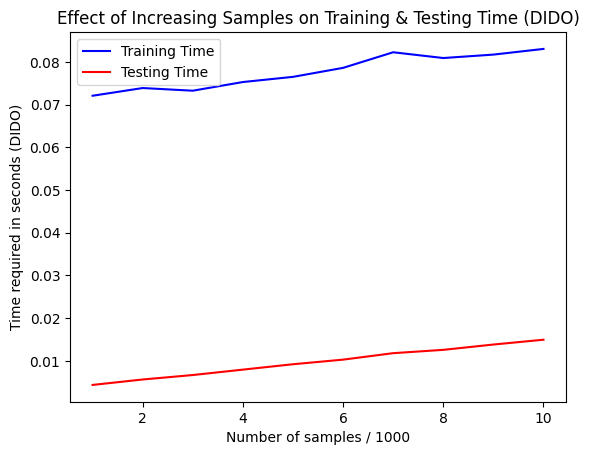

In [ ]:
# Effect of increasing number of samples on training and testing time (DIDO case)

train_times_rows = []
test_times_rows = []
num_splits = 10
chunk_size = N // num_splits

for split in range(1, num_splits + 1):
    end_idx = chunk_size * split
    X_subset = features[:end_idx]
    y_subset = labels[:end_idx]

    train_repeats = []
    test_repeats = []

    for _ in range(num_average_time):
        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X_subset, y_subset, test_size=0.3, random_state=42
        )

        X_train = X_train.reset_index(drop=True)
        y_train = pd.Series(y_train).reset_index(drop=True)

        # Training
        start = time.time()
        dtree = DecisionTree(criterion="information_gain")
        dtree.fit(X_train, y_train)
        end = time.time()
        train_repeats.append(end - start)

        # Testing
        start = time.time()
        preds = dtree.predict(X_test)
        end = time.time()
        test_repeats.append(end - start)

    # Average over multiple runs
    train_times_rows.append(np.mean(train_repeats))
    test_times_rows.append(np.mean(test_repeats))

# Plotting
x_axis = np.linspace(1, num_splits, num_splits)
plt.plot(x_axis, train_times_rows, color="blue", label="Training Time")
plt.plot(x_axis, test_times_rows, color="red", label="Testing Time")
plt.xlabel("Number of samples / 1000")
plt.ylabel("Time required in seconds (DIDO)")
plt.title("Effect of Increasing Samples on Training & Testing Time (DIDO)")
plt.legend()
plt.show()

### Real Input Discrete Output (RIDO)

In [ ]:
# synthetic dataset
N = 1000
M = 5
features = pd.DataFrame(np.random.randn(N, M)) # real-valued features
labels = pd.Series(np.random.randint(0, 2, N)) # discrete (0/1) output

avg_train_per_feature = []
avg_test_per_feature = []

# 1 feature
one_feat_train = []
one_feat_test = []

for col in features.columns:
    subset = features[[col]]
    X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

    X_tr = X_tr.reset_index(drop=True)
    y_tr = pd.Series(y_tr).reset_index(drop=True)

    # training
    start = time.time()
    model = DecisionTree(criterion="information_gain")
    model.fit(X_tr, y_tr)
    end = time.time()
    one_feat_train.append(end - start)

    # testing
    start = time.time()
    _ = model.predict(X_te.reset_index(drop=True))
    end = time.time()
    one_feat_test.append(end - start)

print(f"Train time (1 feature): {np.mean(one_feat_train)}")
print(f"Test time  (1 feature): {np.mean(one_feat_test)}")

avg_train_per_feature.append(np.mean(one_feat_train))
avg_test_per_feature.append(np.mean(one_feat_test))


# 2 features
two_feat_train = []
two_feat_test = []

for i in range(len(features.columns)):
    for j in range(i + 1, len(features.columns)):
        subset = features[[features.columns[i], features.columns[j]]]
        X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

        X_tr = X_tr.reset_index(drop=True)
        y_tr = pd.Series(y_tr).reset_index(drop=True)

        start = time.time()
        model = DecisionTree(criterion="information_gain", max_depth=5)
        model.fit(X_tr, y_tr)
        end = time.time()
        two_feat_train.append(end - start)

        start = time.time()
        _ = model.predict(X_te.reset_index(drop=True))
        end = time.time()
        two_feat_test.append(end - start)

print(f"Train time (2 features): {np.mean(two_feat_train)}")
print(f"Test time  (2 features): {np.mean(two_feat_test)}")

avg_train_per_feature.append(np.mean(two_feat_train))
avg_test_per_feature.append(np.mean(two_feat_test))


# 3 features
three_feat_train = []
three_feat_test = []

for a in range(len(features.columns)):
    for b in range(a + 1, len(features.columns)):
        for c in range(b + 1, len(features.columns)):
            subset = features[[features.columns[a], features.columns[b], features.columns[c]]]
            X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

            X_tr = X_tr.reset_index(drop=True)
            y_tr = pd.Series(y_tr).reset_index(drop=True)

            start = time.time()
            model = DecisionTree(max_depth=5, criterion="information_gain")
            model.fit(X_tr, y_tr)
            end = time.time()
            three_feat_train.append(end - start)

            start = time.time()
            _ = model.predict(X_te.reset_index(drop=True))
            end = time.time()
            three_feat_test.append(end - start)

print(f"Train time (3 features): {np.mean(three_feat_train)}")
print(f"Test time  (3 features): {np.mean(three_feat_test)}")

avg_train_per_feature.append(np.mean(three_feat_train))
avg_test_per_feature.append(np.mean(three_feat_test))


# 4 features
four_feat_train = []
four_feat_test = []

subset = features.iloc[:, :4]
X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

X_tr = X_tr.reset_index(drop=True)
y_tr = pd.Series(y_tr).reset_index(drop=True)

start = time.time()
model = DecisionTree(criterion="information_gain")
model.fit(X_tr, y_tr)
end = time.time()
four_feat_train.append(end - start)

start = time.time()
_ = model.predict(X_te.reset_index(drop=True))
end = time.time()
four_feat_test.append(end - start)

print(f"Train time (4 features): {np.mean(four_feat_train)}")
print(f"Test time  (4 features): {np.mean(four_feat_test)}")

avg_train_per_feature.append(np.mean(four_feat_train))
avg_test_per_feature.append(np.mean(four_feat_test))


# 5 features
five_feat_train = []
five_feat_test = []

subset = features
X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

X_tr = X_tr.reset_index(drop=True)
y_tr = pd.Series(y_tr).reset_index(drop=True)

start = time.time()
model = DecisionTree(criterion="information_gain")
model.fit(X_tr, y_tr)
end = time.time()
five_feat_train.append(end - start)

start = time.time()
_ = model.predict(X_te.reset_index(drop=True))
end = time.time()
five_feat_test.append(end - start)

print(f"Train time (5 features): {np.mean(five_feat_train)}")
print(f"Test time  (5 features): {np.mean(five_feat_test)}")

avg_train_per_feature.append(np.mean(five_feat_train))
avg_test_per_feature.append(np.mean(five_feat_test))

Train time (1 feature): 0.5202360153198242
Test time  (1 feature): 0.004629993438720703
Train time (2 features): 1.494283390045166
Test time  (2 features): 0.004922890663146972
Train time (3 features): 3.1845077514648437
Test time  (3 features): 0.006034326553344726
Train time (4 features): 8.307821035385132
Test time  (4 features): 0.009675025939941406
Train time (5 features): 10.993347883224487
Test time  (5 features): 0.010323047637939453


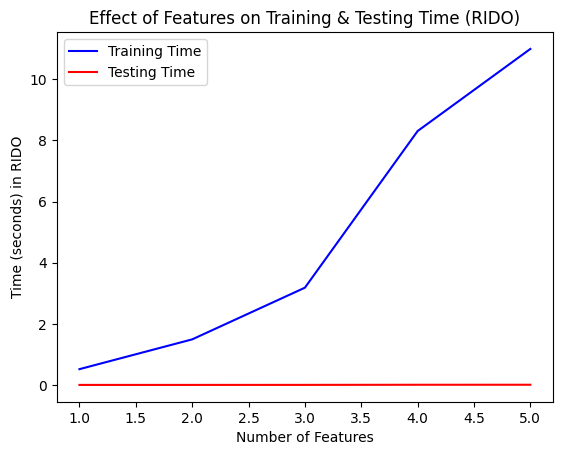

In [ ]:
# Plot
x_vals = np.arange(1, 6)
plt.plot(x_vals, avg_train_per_feature, color="blue", label="Training Time")
plt.plot(x_vals, avg_test_per_feature, color="red", label="Testing Time")
plt.xlabel("Number of Features")
plt.ylabel("Time (seconds) in RIDO")
plt.title("Effect of Features on Training & Testing Time (RIDO)")
plt.legend()
plt.show()

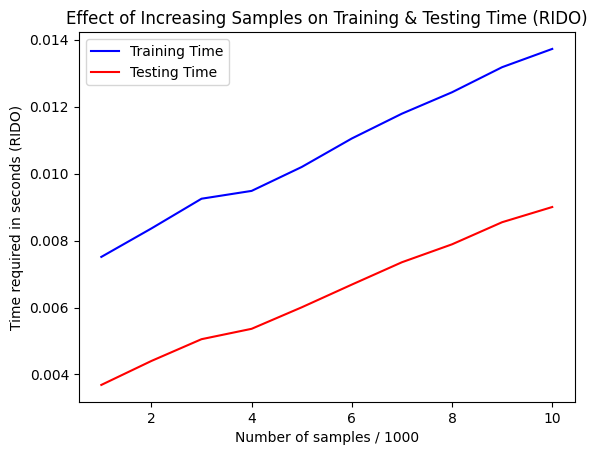

In [ ]:
# Effect of increasing number of samples on training and testing time (RIDO case)

train_times_rows = []
test_times_rows = []
num_splits = 10
chunk_size = N // num_splits

for split in range(1, num_splits + 1):
    end_idx = chunk_size * split
    X_subset = features[:end_idx]
    y_subset = labels[:end_idx]

    train_repeats, test_repeats = [], []

    for _ in range(num_average_time):
        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

        X_train = X_train.reset_index(drop=True)
        y_train = pd.Series(y_train).reset_index(drop=True)

        # Training
        start = time.time()
        dtree = DecisionTree(criterion="information_gain")
        dtree.fit(X_train, y_train)
        end = time.time()
        train_repeats.append(end - start)

        # Testing
        start = time.time()
        preds = dtree.predict(X_test)
        end = time.time()
        test_repeats.append(end - start)

    # Average across repetitions
    train_times_rows.append(np.mean(train_repeats))
    test_times_rows.append(np.mean(test_repeats))

# Plot
x_axis = np.linspace(1, num_splits, num_splits)
plt.plot(x_axis, train_times_rows, color="blue", label="Training Time")
plt.plot(x_axis, test_times_rows, color="red", label="Testing Time")
plt.xlabel("Number of samples / 1000")
plt.ylabel("Time required in seconds (RIDO)")
plt.title("Effect of Increasing Samples on Training & Testing Time (RIDO)")
plt.legend()
plt.show()

### Real Input Real Output


In [ ]:
# Synthetic dataset for RIRO
N = 1000
M = 5
features = pd.DataFrame(np.random.randn(N, M))  # real-valued features
labels = pd.Series(np.random.randn(N))          # real-valued target

avg_train_per_feature = []
avg_test_per_feature = []

# 1 feature
one_feat_train_times = []
one_feat_test_times = []

for col in features.columns:
    subset = features[[col]]
    X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

    X_tr = X_tr.reset_index(drop=True)
    y_tr = y_tr.reset_index(drop=True)

    start = time.time()
    dtree = DecisionTree(criterion="information_gain")
    dtree.fit(X_tr, y_tr)
    end = time.time()
    one_feat_train_times.append(end - start)

    start = time.time()
    _ = dtree.predict(X_te.reset_index(drop=True))
    end = time.time()
    one_feat_test_times.append(end - start)

print(f"Train time (1 feature): {np.mean(one_feat_train_times)}")
print(f"Test time  (1 feature): {np.mean(one_feat_test_times)}")

avg_train_per_feature.append(np.mean(one_feat_train_times))
avg_test_per_feature.append(np.mean(one_feat_test_times))


# 2 features
two_feat_train_times = []
two_feat_test_times = []

for i in range(len(features.columns)):
    for j in range(i + 1, len(features.columns)):
        subset = features[[features.columns[i], features.columns[j]]]
        X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

        X_tr = X_tr.reset_index(drop=True)
        y_tr = y_tr.reset_index(drop=True)

        start = time.time()
        dtree = DecisionTree(max_depth=5, criterion="information_gain")
        dtree.fit(X_tr, y_tr)
        end = time.time()
        two_feat_train_times.append(end - start)

        start = time.time()
        _ = dtree.predict(X_te.reset_index(drop=True))
        end = time.time()
        two_feat_test_times.append(end - start)

print(f"Train time (2 features): {np.mean(two_feat_train_times)}")
print(f"Test time  (2 features): {np.mean(two_feat_test_times)}")

avg_train_per_feature.append(np.mean(two_feat_train_times))
avg_test_per_feature.append(np.mean(two_feat_test_times))


# 3 features
three_feat_train_times = []
three_feat_test_times = []

for a in range(len(features.columns)):
    for b in range(a + 1, len(features.columns)):
        for c in range(b + 1, len(features.columns)):
            subset = features[[features.columns[a], features.columns[b], features.columns[c]]]
            X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

            X_tr = X_tr.reset_index(drop=True)
            y_tr = y_tr.reset_index(drop=True)

            start = time.time()
            dtree = DecisionTree(max_depth=5, criterion="information_gain")
            dtree.fit(X_tr, y_tr)
            end = time.time()
            three_feat_train_times.append(end - start)

            start = time.time()
            _ = dtree.predict(X_te.reset_index(drop=True))
            end = time.time()
            three_feat_test_times.append(end - start)

print(f"Train time (3 features): {np.mean(three_feat_train_times)}")
print(f"Test time  (3 features): {np.mean(three_feat_test_times)}")

avg_train_per_feature.append(np.mean(three_feat_train_times))
avg_test_per_feature.append(np.mean(three_feat_test_times))


# 4 features
four_feat_train_times = []
four_feat_test_times = []

subset = features.iloc[:, :4]
X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

X_tr = X_tr.reset_index(drop=True)
y_tr = y_tr.reset_index(drop=True)

start = time.time()
dtree = DecisionTree(max_depth=5, criterion="information_gain")
dtree.fit(X_tr, y_tr)
end = time.time()
four_feat_train_times.append(end - start)

start = time.time()
_ = dtree.predict(X_te.reset_index(drop=True))
end = time.time()
four_feat_test_times.append(end - start)

print(f"Train time (4 features): {np.mean(four_feat_train_times)}")
print(f"Test time  (4 features): {np.mean(four_feat_test_times)}")

avg_train_per_feature.append(np.mean(four_feat_train_times))
avg_test_per_feature.append(np.mean(four_feat_test_times))


# 5 features
five_feat_train_times = []
five_feat_test_times = []

subset = features
X_tr, X_te, y_tr, y_te = train_test_split(subset, labels, test_size=0.3, random_state=42)

X_tr = X_tr.reset_index(drop=True)
y_tr = y_tr.reset_index(drop=True)

start = time.time()
dtree = DecisionTree(max_depth=5, criterion="information_gain")
dtree.fit(X_tr, y_tr)
end = time.time()
five_feat_train_times.append(end - start)

start = time.time()
_ = dtree.predict(X_te.reset_index(drop=True))
end = time.time()
five_feat_test_times.append(end - start)

print(f"Train time (5 features): {np.mean(five_feat_train_times)}")
print(f"Test time  (5 features): {np.mean(five_feat_test_times)}")

avg_train_per_feature.append(np.mean(five_feat_train_times))
avg_test_per_feature.append(np.mean(five_feat_test_times))

Train time (1 feature): 0.9385255813598633
Test time  (1 feature): 0.0072214603424072266
Train time (2 features): 2.747099280357361
Test time  (2 features): 0.008001041412353516
Train time (3 features): 5.4391042470932005
Test time  (3 features): 0.00873711109161377
Train time (4 features): 9.233474969863892
Test time  (4 features): 0.009541988372802734
Train time (5 features): 12.01181173324585
Test time  (5 features): 0.010269880294799805


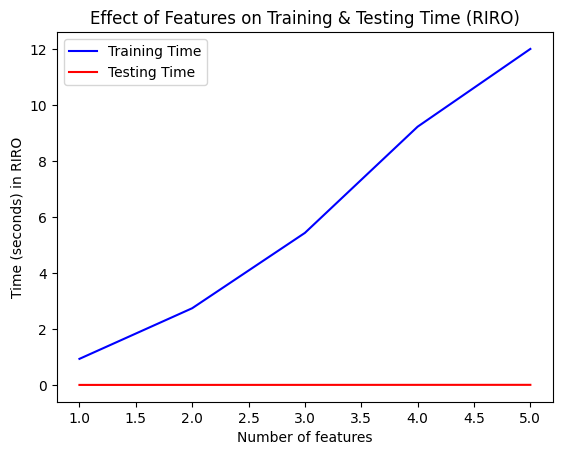

In [ ]:
# Plot
x_axis = np.arange(1, 6)
plt.plot(x_axis, avg_train_per_feature, color="blue", label="Training Time")
plt.plot(x_axis, avg_test_per_feature, color="red", label="Testing Time")
plt.xlabel("Number of features")
plt.ylabel("Time (seconds) in RIRO")
plt.title("Effect of Features on Training & Testing Time (RIRO)")
plt.legend()
plt.show()

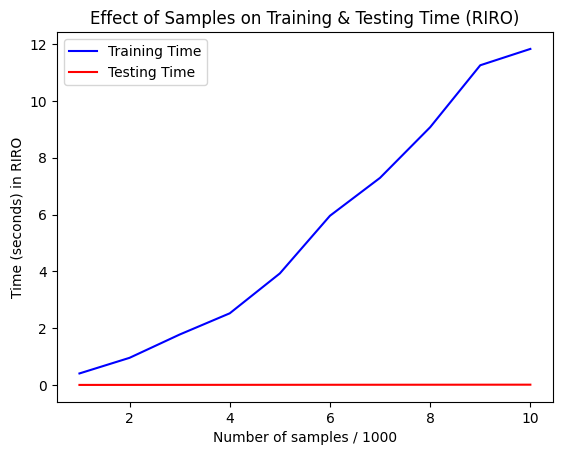

In [ ]:
# Effect of increasing number of samples on training and testing time (RIRO)

train_times_rows = []
test_times_rows = []
num_splits = 10
chunk_size = N // num_splits

for split in range(1, num_splits + 1):
    end_idx = chunk_size * split
    X_subset = features[:end_idx]
    y_subset = labels[:end_idx]

    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)

    start = time.time()
    dtree = DecisionTree(criterion="information_gain")
    dtree.fit(X_train, y_train)
    end = time.time()
    train_times_rows.append(end - start)

    start = time.time()
    _ = dtree.predict(X_test.reset_index(drop=True))
    end = time.time()
    test_times_rows.append(end - start)

# Plotting
x_axis = np.linspace(1, num_splits, num_splits)
plt.plot(x_axis, train_times_rows, color="blue", label="Training Time")
plt.plot(x_axis, test_times_rows, color="red", label="Testing Time")
plt.xlabel("Number of samples / 1000")
plt.ylabel("Time (seconds) in RIRO")
plt.title("Effect of Samples on Training & Testing Time (RIRO)")
plt.legend()
plt.show()

### Theoretical complexity curve (O(n log n))

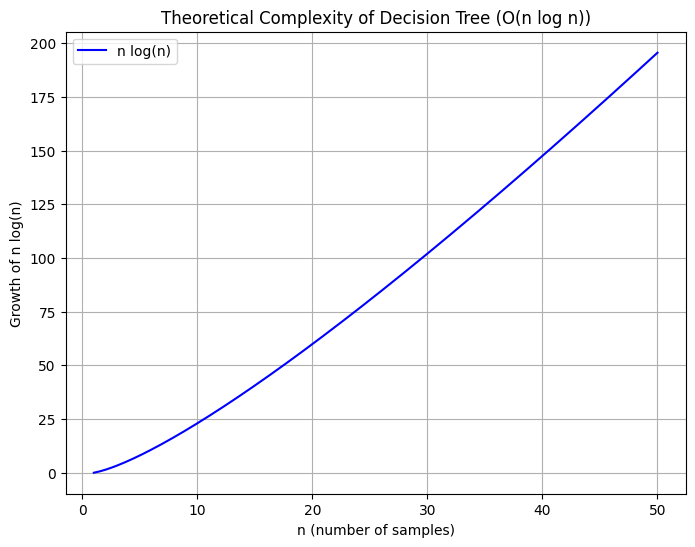

In [ ]:
n_vals= np.linspace(1, 50, 200)
y_vals= n_vals * np.log(n_vals)

plt.figure(figsize=(8, 6))
plt.plot(n_vals, y_vals, color="blue", label="n log(n)")
plt.xlabel("n (number of samples)")
plt.ylabel("Growth of n log(n)")
plt.title("Theoretical Complexity of Decision Tree (O(n log n))")
plt.legend()
plt.grid(True)
plt.show()

### Analysis

1. Varying the Number of Features
Across all four cases (DIDO, DIRO, RIDO, RIRO), we observe that **training time increases sharply** as the number of features increases, while **testing time remains almost constant**. This happens because of the fact that training a decision tree involves checking multiple candidate splits for each feature. More features means more computations at each node which leads to higher training cost. While, testing (prediction) only requires traversing the trained tree, so its cost is nearly constant regardless of the number of features.  The **Theoretical complexity:** for training is **O(n × m × log n)**, where *n* = samples and *m* = features.  And for prediction it is **O(log n)** per sample. Our results match this complexity as training grows with features,while, testing does not.

2. Varying the Number of Samples
When the number of samples increases, **both training and testing times rise**, but training grows faster. This happens because training cost is roughly **O(n log n)**, which increases steadily as *n* increases. The testing cost is **O(log n)** per sample, so it grows much slower. The training curves we obtained resemble the **n log n** shape shown in the theoretical complexity plot. Testing curves are consistently below training curves, as expected.

3. Other observations
- **DIDO (Discrete Input, Discrete Output):** This case was fastest to train and test as splits are simple in this case.
- **DIRO (Discrete Input, Real Output):** Here, training time grows faster due to continuous outputs.  
- **RIDO (Real Input, Discrete Output):** More expensive, as real-valued features add many split candidates.  
- **RIRO (Real Input, Real Output):** This is the slowest case as both inputs and outputs are continuous, leading to maximum computation.
